# CS 124 Lecture: Skip Lists and Hash Table

__Boaz Barak__

April 1, 2019

# Skip lists

In [19]:
import graphviz
from graphviz import Graph
from graphviz import Digraph
# Graph visualization library - requires graphviz on your system
# On Anaconda can install by
# conda install -c anaconda graphviz  (or download at https://www.graphviz.org/download/ )
# conda install -c conda-forge python-graphviz

In [20]:
import random

In [21]:
def method(cls,f):
    setattr(cls,f.__name__,f)

In [57]:
INF = 100000000 # Our proxy for "infinity"

In [58]:
PRINT_COIN = True

def coin():
    """Toss random coin"""
    c =  random.choice([0,1])
    if PRINT_COIN: print(["TAIL","HEAD"][c])
    return c

In [24]:
class Node:
    def __init__(self,key,right=None,down=None): 
        self.key = key
        self.right = right
        self.down = down


In [25]:
class SkipList:
    topleft= None
    def __init__(self):
        topright = Node(+INF)
        self.topleft = Node(-INF,topright)

In [26]:
counter = 0

def valstr(v):
    if v>=INF: return "+∞"
    if v<=-INF: return "-∞"
    return str(v)

def list2graph(G,n,x=0,y=0):
    if not n: return None
    global counter
    counter += 1
    vertex = str(id(n))
    G.node(vertex,valstr(n.key), pos = f"{x},{y}!")
    right = list2graph(G,n.right,x+1,y)
    down = list2graph(G,n.down,x,y-1)
    if right: G.edge(vertex,right)
    if down: G.edge(vertex,down)
    return vertex

def _repr_svg_(self):
    G =Digraph(engine="neato",graph_attr= {"concentrate":"true"} )
    list2graph(G,self.topleft)
    return G._repr_svg_()

method(SkipList,_repr_svg_)

In [27]:
def pred_(n,val):
    """Find the node in the list with key ≤ val"""
    if n.right.key<=val: return pred_(n.right,val)
    if not n.down: return n
    return pred_(n.down,val)

In [28]:
def pred(self,val):
    return pred_(self.topleft,val).key

method(SkipList,pred)

In [29]:
def add_(n,val):
    """
    Add a node with key val to the right and down of node n
    Return "STOP" if there is no promotion 
    """
    if not n: return None
    if n.right.key <= val: return add_(n.right,val)
    v = add_(n.down,val)
    if v=="STOP": return v
    temp = Node(val,n.right,v) # stick temp between n and n.right, temp points down to v
    n.right = temp
    if coin(): return temp
    return "STOP"

In [30]:
def add(self,val):
    """Add a value to the list"""
    add_(self.topleft,val)
    if self.topleft.right.key < +INF:
        topright = Node(+INF)
        self.topleft = Node(-INF,topright,self.topleft)
    return self
    
method(SkipList,add)

In [31]:
L = SkipList()

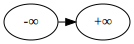

In [32]:
L

TAIL
HEAD
HEAD
HEAD
HEAD
HEAD
HEAD
HEAD
TAIL


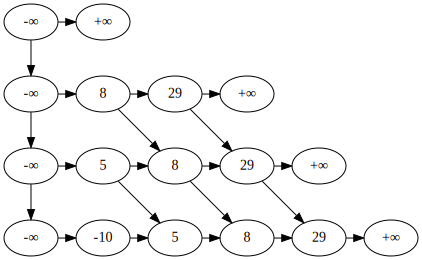

In [33]:
L.add(-10).add(5).add(29).add(8)

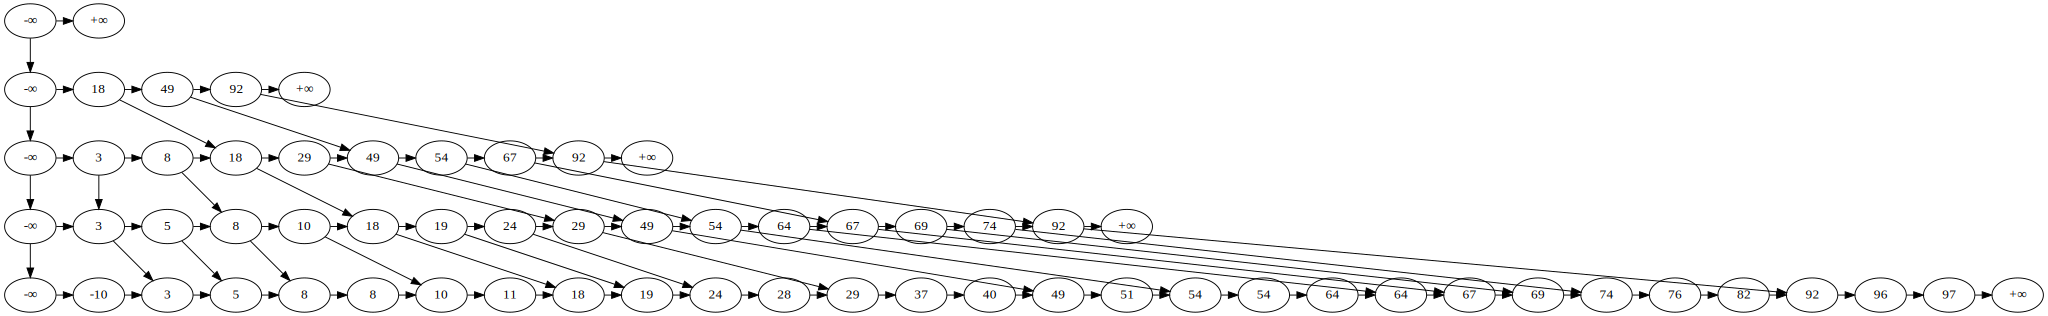

In [60]:
PRINT_COIN = False
for i in range(8):
    L.add(random.randint(1,100))
L

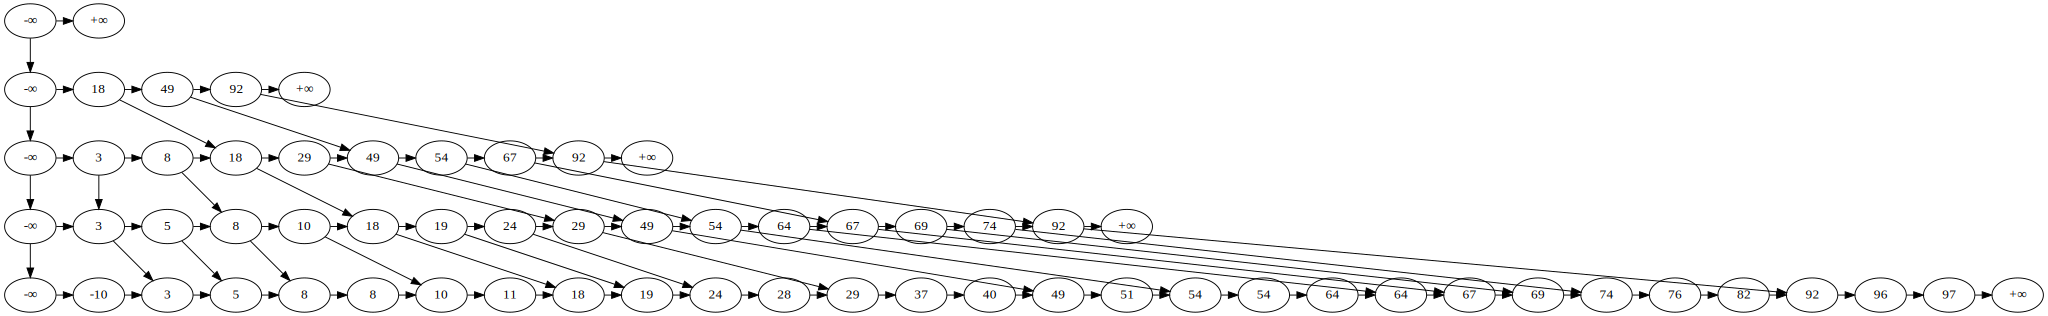

In [62]:
L

In [61]:
L.pred(20)

19

# Hash tables

In [37]:
filename = 'cs124.csv'
# filename = 'CSV_Database_of_Last_Names.csv'

import csv
students = []
with open(filename,encoding='utf8') as csvfile:
    dialect = csv.Sniffer().sniff(csvfile.read(1024))
    csvfile.seek(0)
    reader = csv.reader(csvfile,dialect)
    for row in reader:
        students += ["".join([s.strip() for s in row])]

In [38]:
students = students[1:]

In [39]:
len(students)

283

In [40]:
N = 300

In [41]:
def letter2number(let): 
    # Given letter let, returns number from 1 to 26 based on alphabetical order
    return ord(let.lower())-ord('a')+1

def silly_hash(name):
    # Hash  name into a number from 0 to N-1
    # N is a global constant
    # Simply output first initial (as number from 1 to 26) times the length modulo N 
    return letter2number(name[0])*len(name) % N

In [42]:
silly_hash("Boaz Barak")

20

In [43]:
silly_hash("Jelani Nelson")

130

In [44]:
import random
NUMBERS = [random.randint(0,N-1) for i in range(30)]
print(NUMBERS)

[290, 228, 11, 211, 179, 50, 264, 123, 124, 67, 100, 215, 198, 159, 45, 152, 208, 190, 177, 153, 225, 79, 21, 154, 139, 167, 55, 0, 174, 149]


In [45]:
def better_hash(name):
    # DISCLAIMER: Despite name, DONT USE IT IN YOUR CODE - 
    # always use BUILT IN or CRYPTOGRAPHIC hash functions
    #
    # Hashes name into a number from 0 to N-1
    # N is a global constant
    # Treat name as a sequence (x0,x1,x2,...) of numbers from 1 to 26
    # Return sum of xi*NUMBERS[i] mod N
    # NUMBERS is a global constant array of numbers that we chose at random once
    # and then fixed once and for all
    name = name.replace(' ',"") # hack to ensure only letters
    return sum([letter2number(name[i])*NUMBERS[i] for i in range(len(name))]) % N
    

In [63]:
better_hash("Boaz Barak")

244

In [47]:
better_hash("Jelani Nelson")

21

In [48]:
better_hash("Jelani Nelson")

21

In [49]:
buckets =  [0]*N
for name in students:
    buckets[silly_hash(name)] += 1

In [50]:
%matplotlib inline

In [51]:
import matplotlib.pyplot as plt

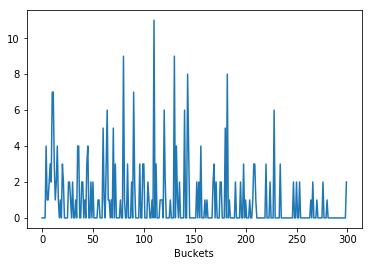

In [52]:
plt.plot(buckets)
plt.xlabel('Buckets')
plt.show()

In [53]:
sum([i*i for i in buckets])/sum(buckets)

4.293286219081272

In [54]:
buckets =  [0]*N
for name in students:
    buckets[better_hash(name) % N] += 1

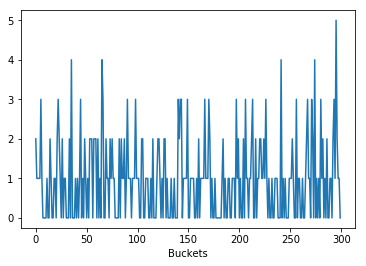

In [55]:
plt.plot(buckets)
plt.xlabel('Buckets')
plt.show()

In [56]:
sum([i*i for i in buckets])/sum(buckets)

2.0035335689045937